In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy
import itertools
from scipy import stats
from scipy.stats import pearsonr, ttest_ind #Pearsonr - says if the correlation exisits (-1 to 1) between x and y axis.

#The correlation coefficient is calculated for a sample in a given population and to know wheather the correlation coefficient is significantly different from zero based on the sample collected can be tested by ttest
# Unlike covariance where it only states the data is in same or opposite direction correlation also gives how strong the relation is.
#-1 - Strongest inverse correlation, 1 - Strongest positive correlation, 0 - No correlation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashishrangabatla","key":"971c06652f574d81db1d33b9b1203e45"}'}

In [3]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d ananthr1/weather-prediction

Dataset URL: https://www.kaggle.com/datasets/ananthr1/weather-prediction
License(s): CC-BY-NC-SA-4.0
  0% 0.00/11.5k [00:00<?, ?B/s]
100% 11.5k/11.5k [00:00<00:00, 68.1MB/s]


In [5]:
!unzip weather-prediction.zip

Archive:  weather-prediction.zip
  inflating: seattle-weather.csv     


In [6]:
data = pd.read_csv('seattle-weather.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [7]:
data.shape

(1461, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


DATA VISUALIZATION

In [9]:
le = LabelEncoder()
data['encoded_weather'] = le.fit_transform(data['weather'])
data.head()

,date,precipitation,temp_max,temp_min,wind,weather,encoded_weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2


In [10]:
le.classes_

array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

In [11]:
# Creating a dictionary to map the encoded data to actual names
weather_names = dict(zip(le.classes_, le.transform(le.classes_)))
weather_names

{'drizzle': np.int64(0),
 'fog': np.int64(1),
 'rain': np.int64(2),
 'snow': np.int64(3),
 'sun': np.int64(4)}

/tmp/ipython-input-12-846700348.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='encoded_weather', data=data, palette='deep')


<Axes: xlabel='encoded_weather', ylabel='count'>

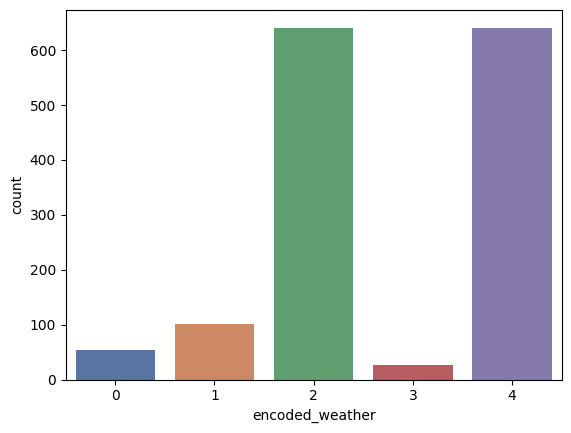

In [12]:
sns.countplot(x='encoded_weather', data=data, palette='deep')

In [13]:
weather_counts = data['weather'].value_counts()
weather_counts

,count
weather,
rain,641
sun,640
fog,101
drizzle,53
snow,26


In [14]:
# What is the percentage of each unique value in the weather column
for weather, count in weather_counts.items():
    percent = (count / len(data)) * 100
    print(f"Percent of {weather.capitalize()}: {percent:.2f}%")

Percent of Rain: 43.87%
Percent of Sun: 43.81%
Percent of Fog: 6.91%
Percent of Drizzle: 3.63%
Percent of Snow: 1.78%


In [15]:
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


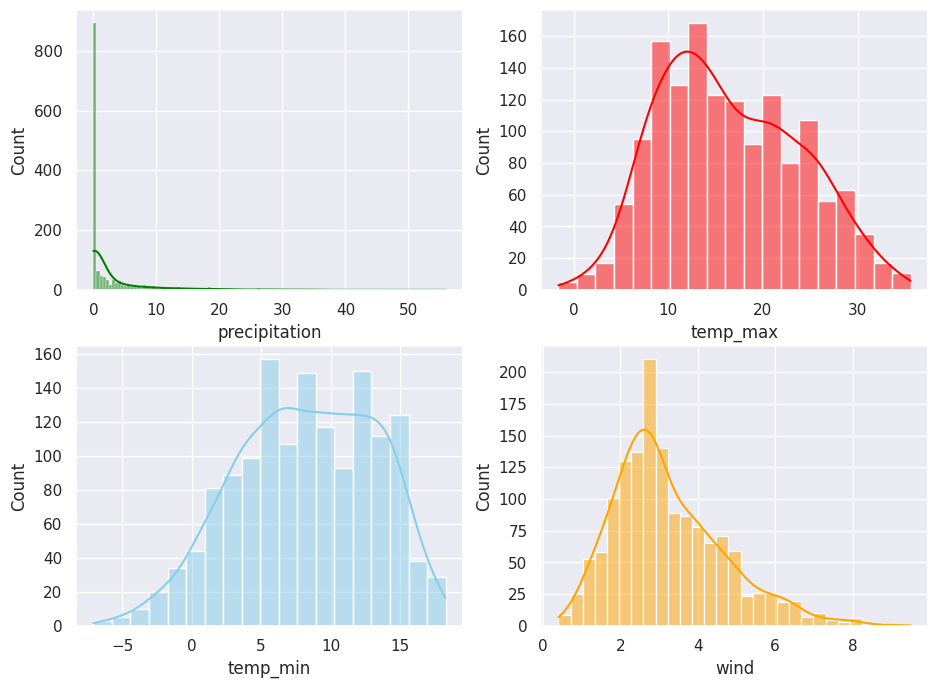

In [16]:
sns.set(style="darkgrid")
variables = ["precipitation", "temp_max", "temp_min", "wind"]
colors = ["green", "red", "skyblue", "orange"]

fig, axs = plt.subplots(2, 2, figsize=(11, 8))
for i, var in enumerate(variables):
    sns.histplot(data=data, x=var, kde=True, ax=axs[i//2, i%2], color=colors[i])

# BOXPLOT to find outliers

/tmp/ipython-input-17-3038210614.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="precipitation", y="weather", data=data, palette="winter", ax=ax)


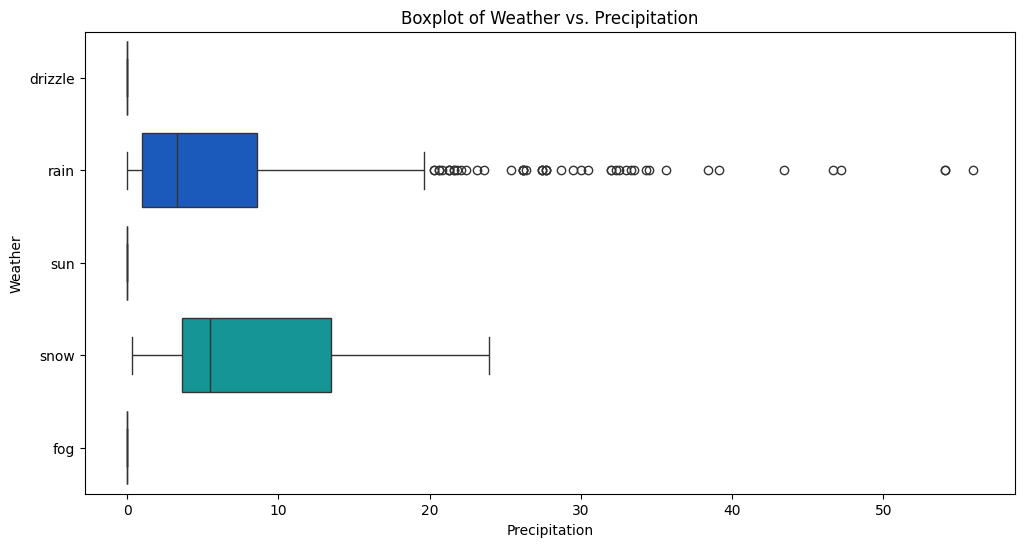

In [17]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.boxplot(x="precipitation", y="weather", data=data, palette="winter", ax=ax)
    ax.set(xlabel='Precipitation', ylabel='Weather', title='Boxplot of Weather vs. Precipitation')

/tmp/ipython-input-18-4271843321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_max", y="weather", data=data, palette="spring", ax=ax)


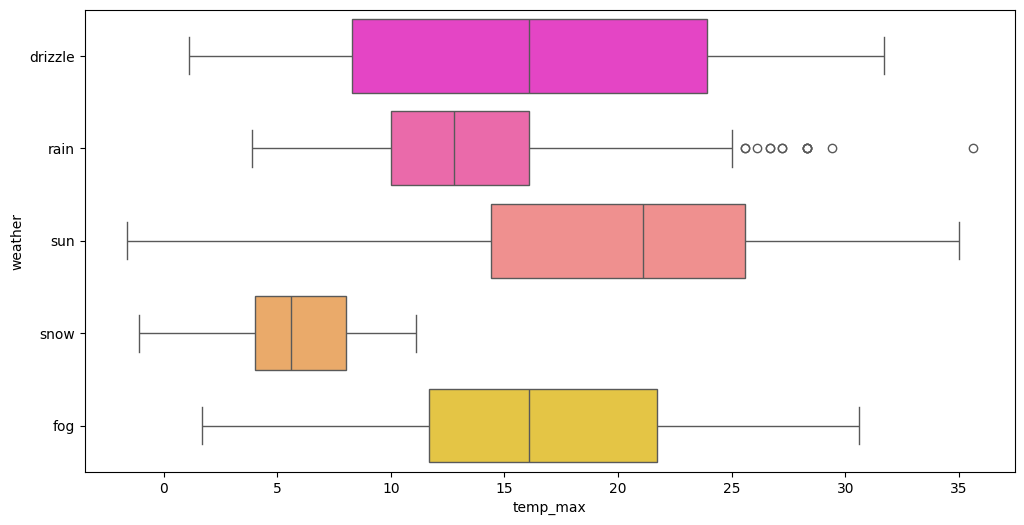

In [18]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_max", y="weather", data=data, palette="spring", ax=ax)

/tmp/ipython-input-19-1567082730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wind", y="weather", data=data, palette="summer", ax=ax)


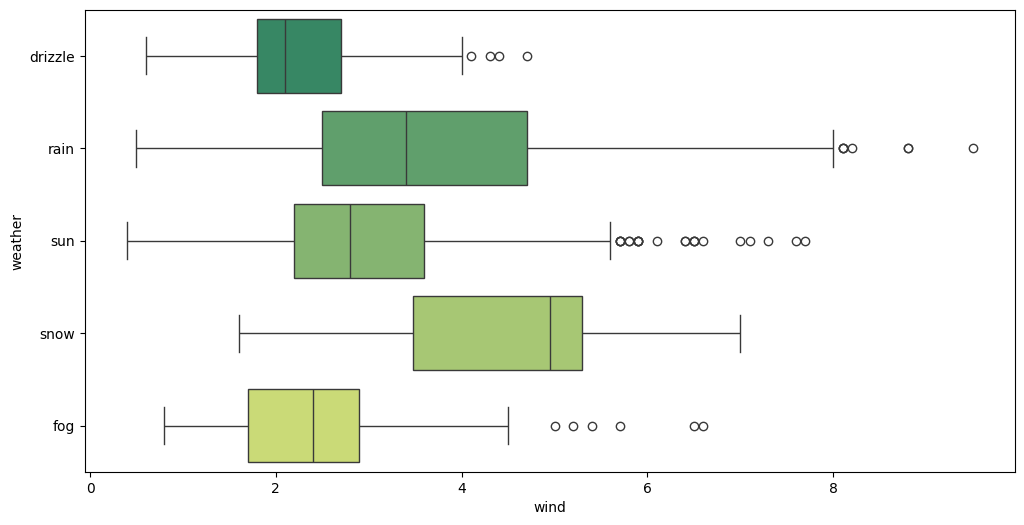

In [19]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="wind", y="weather", data=data, palette="summer", ax=ax)

/tmp/ipython-input-20-3790008686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_min", y="weather", data=data, palette="autumn", ax=ax)


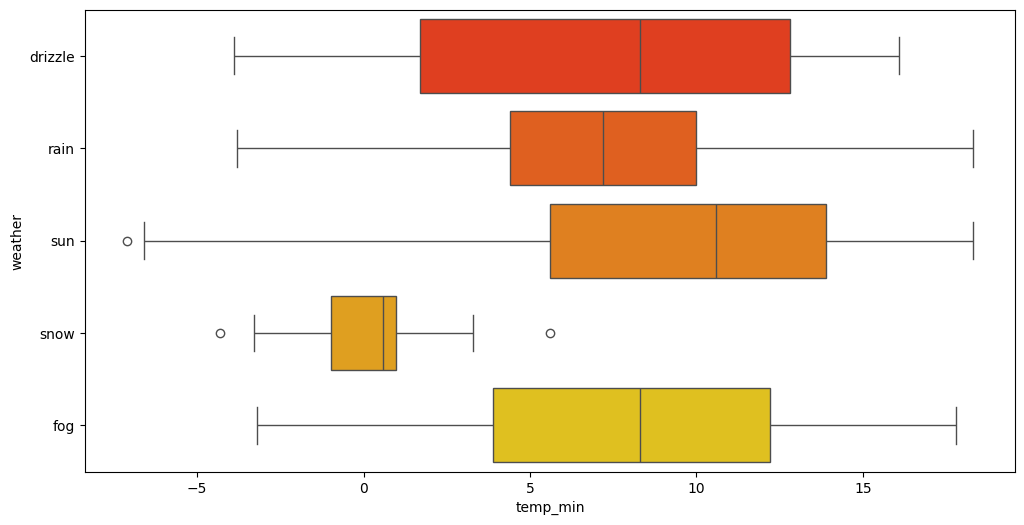

In [20]:

with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_min", y="weather", data=data, palette="autumn", ax=ax)

# Calculating Pearson Correlation

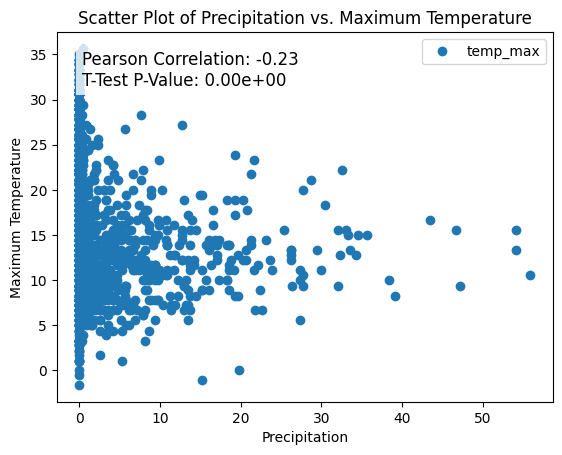

In [21]:
# Calculate the Pearson correlation coefficient and t-test p-value between the precipitation and temp_max variables
corr = data["precipitation"].corr(data["temp_max"])
ttest, pvalue = stats.ttest_ind(data["precipitation"],data["temp_max"])

with plt.style.context('default'):
    ax = data.plot("precipitation", "temp_max", style='o')
    ax.set_title('Scatter Plot of Precipitation vs. Maximum Temperature')
    ax.set_xlabel('Precipitation')
    ax.set_ylabel('Maximum Temperature')

    # Adding a text box to the plot with the Pearson correlation coefficient and t-test p-value
    textstr = f'Pearson Correlation: {corr:.2f}\nT-Test P-Value: {pvalue:.2e}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

[Text(0.5, 1.0, 'Scatter plot of Wind vs. Maximum Temperature')]

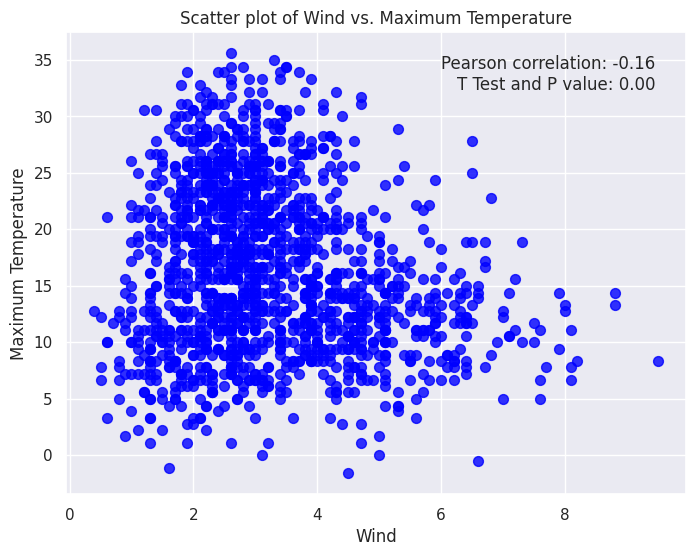

In [22]:

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["wind"], y=data["temp_max"], marker='o', s=50, alpha=0.8, color='blue')

corr, p_value = np.corrcoef(data["wind"], data["temp_max"])[0, 1], np.mean(np.abs(stats.ttest_ind(data["wind"], data["temp_max"])[1]))
ax.text(0.95, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)


ax.set(xlabel='Wind', ylabel='Maximum Temperature')


ax.set(title='Scatter plot of Wind vs. Maximum Temperature')

The correlation is very weak negative as we can see in the above two plots and values of corr, ttest, p-value. The values of ttest, p-value states that both are very different and does contribute in the data. And corr of -0.23 is very weak negative correlation which says that both the data points are inversly proportional but as the value is near to 1 and not -1 they do not follow the inverse quite well.

35.22645781239284 7.526905087245157e-227


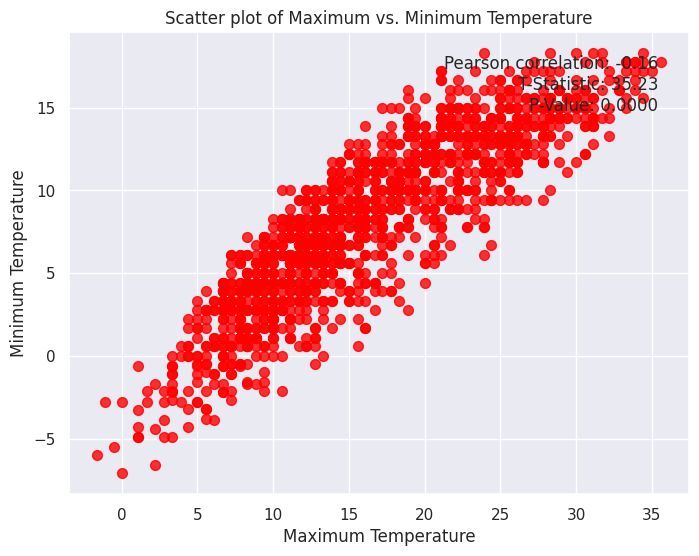

In [23]:

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["temp_max"], y=data["temp_min"], marker='o', s=50, alpha=0.8, color='red')

t_stat, p_val = ttest_ind(data["temp_max"], data["temp_min"])

ax.text(0.95, 0.95, f"Pearson correlation: {corr:.2f}\nT-Statistic: {t_stat:.2f}\nP-Value: {p_val:.4f}",
        transform=ax.transAxes, ha='right', va='top', fontsize=12)

ax.set(xlabel='Maximum Temperature', ylabel='Minimum Temperature')

ax.set(title='Scatter plot of Maximum vs. Minimum Temperature')

print(t_stat, p_val)


The correlation coefficient, t-statistic, and p-value together indicate a strong positive relationship between the two variables in the scatter plot.

The positive Pearson correlation suggests that as one variable increases, the other tends to increase as well.

A high t-statistic reflects a significant difference in means, and the low p-value confirms that this difference is statistically significant, meaning it is very unlikely to have occurred by chance.

Overall, this supports the conclusion that the two variables are strongly and positively associated.

#Data cleaning and preprocessing

##Case 1: Date column is unnecessary

In [24]:
df = data.drop("date", axis=1)
df.head()

,precipitation,temp_max,temp_min,wind,weather,encoded_weather
0,0.0,12.8,5.0,4.7,drizzle,0
1,10.9,10.6,2.8,4.5,rain,2
2,0.8,11.7,7.2,2.3,rain,2
3,20.3,12.2,5.6,4.7,rain,2
4,1.3,8.9,2.8,6.1,rain,2


#Removing Outliers

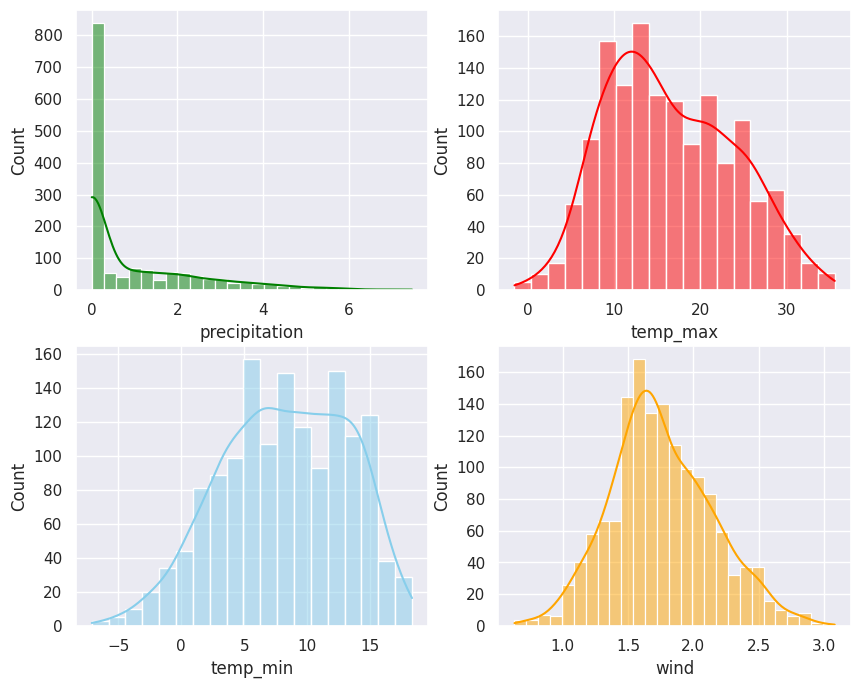

In [25]:
#Applying IQR
Q1 = df.select_dtypes(include='number').quantile(0.25)
Q3 = df.select_dtypes(include='number').quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Create mask to keep rows without outliers
mask = df[Q1.index].apply(lambda x: (x >= lower[x.name]) & (x <= upper[x.name]))

# Keeping only rows with no outliers across all numeric columns
df_filtered = df[mask.all(axis=1)]

# Take the square root of the "precipitation" column
df["precipitation"] = np.sqrt(df["precipitation"])

# Take the square root of the "wind" column
df["wind"] = np.sqrt(df["wind"])


sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# loop through each column and its index in the dataframe
for i, column in enumerate(["precipitation", "temp_max", "temp_min", "wind"]):

    # create a histogram plot for the current column, with a kernel density estimate
    # set the current axis to the appropriate subplot in the grid
    # set the color of the histogram based on the index of the current column
    sns.histplot(data=df, x=column, kde=True, ax=axs[i//2, i%2], color=['green', 'red', 'skyblue', 'orange'][i])


In [26]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,encoded_weather
0,0.000000,12.8,5.0,2.167948,drizzle,0
1,3.301515,10.6,2.8,2.121320,rain,2
2,0.894427,11.7,7.2,1.516575,rain,2
3,4.505552,12.2,5.6,2.167948,rain,2
4,1.140175,8.9,2.8,2.469818,rain,2


In [ ]:
df = df.drop("weather", axis=1)

In [29]:
x = ((df.loc[:,df.columns!="weather_encoded"]).astype(int)).values # .values converts pandas or DF to numpy arrays as ML models expect a numpy array not pandas or DFs
y = df["encoded_weather"].values

In [30]:
df.head(5)

,precipitation,temp_max,temp_min,wind,encoded_weather
0,0.000000,12.8,5.0,2.167948,0
1,3.301515,10.6,2.8,2.121320,2
2,0.894427,11.7,7.2,1.516575,2
3,4.505552,12.2,5.6,2.167948,2
4,1.140175,8.9,2.8,2.469818,2


In [32]:
df.encoded_weather.unique()

array([0, 2, 4, 3, 1])

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

#MODEL TRAINING

###K-NEAREST NEIGHBOR CLASSIFIER

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# create a KNN classifier and fit it to the training data
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# calculate the accuracy score of the KNN classifier on the test data
knn_score = knn.score(x_test, y_test)
print("KNN Accuracy:", knn_score)

KNN Accuracy: 0.9183673469387755


In [41]:
# use the KNN classifier to predict the labels of the test data
y_pred_knn = knn.predict(x_test)

# create a confusion matrix of the KNN classifier's predictions
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# print the confusion matrix
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[ 1  4  0  0  0]
 [ 0  4  1  0  0]
 [ 0  3 75  0  1]
 [ 0  0  1  3  2]
 [ 0  0  0  0 52]]


How to interpret confusion matrix?

|              | Pred 0 | Pred 1 | Pred 2 | Pred 3 | Pred 4 |
| ------------ | ------ | ------ | ------ | ------ | ------ |
| **Actual 0** | 0      | 1      | 0      | 0      | 4      |
| **Actual 1** | 0      | 0      | 0      | 0      | 5      |
| **Actual 2** | 0      | 0      | 66     | 0      | 13     |
| **Actual 3** | 0      | 0      | 2      | 3      | 1      |
| **Actual 4** | 1      | 4      | 7      | 0      | 40     |

For example:
Actual class 2:

66 samples were correctly predicted as class 2

13 were wrongly predicted as class 4

Actual class 1:

All 5 samples were wrongly predicted as class 4

Actual class 0:

Only 1 was predicted as class 1, 4 were mistaken as class 4

In [42]:
print('KNN Classification Report\n')
# set zero_division parameter to 0 to avoid warning in case of empty classes
print(classification_report(y_test, y_pred_knn, zero_division=0))

KNN Classification Report

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.36      0.80      0.50         5
           2       0.97      0.95      0.96        79
           3       1.00      0.50      0.67         6
           4       0.95      1.00      0.97        52

    accuracy                           0.92       147
   macro avg       0.86      0.69      0.69       147
weighted avg       0.95      0.92      0.92       147



###Decision Tree


We proceed to build a model with different max_depth parameters from 1 to 7 to find the model with the best accuracy.

In [43]:
# Import the DecisionTreeClassifier from Scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Define a range of maximum depths to try
max_depth_range = range(1, 8)

# Create a DecisionTreeClassifier for each maximum depth and evaluate its accuracy
for depth in max_depth_range:
    # Create a DecisionTreeClassifier with the current maximum depth, maximum number of leaf nodes, and a random seed
    dec = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=15, random_state=0)

    # Fit the DecisionTreeClassifier on the training data
    dec.fit(x_train, y_train)

    # Calculate the accuracy of the DecisionTreeClassifier on the test data
    dec_score = dec.score(x_test, y_test)

    # Print the accuracy of the DecisionTreeClassifier for the current maximum depth
    print(f"Decision Tree Accuracy with max depth {depth}: {dec_score}")

Decision Tree Accuracy with max depth 1: 0.891156462585034
Decision Tree Accuracy with max depth 2: 0.9251700680272109
Decision Tree Accuracy with max depth 3: 1.0
Decision Tree Accuracy with max depth 4: 1.0
Decision Tree Accuracy with max depth 5: 1.0
Decision Tree Accuracy with max depth 6: 1.0
Decision Tree Accuracy with max depth 7: 1.0


In [44]:
# Use the DecisionTreeClassifier to predict classes for the test data
y_pred_dec = dec.predict(x_test)

# Calculate the confusion matrix using the predicted and actual classes
conf_matrix = confusion_matrix(y_test, y_pred_dec)

# Print the confusion matrix to the console
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 5  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 79  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 52]]


In [45]:
print('Decision Tree\n',classification_report(y_test,y_pred_dec, zero_division=0))

Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        52

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147



#Logistic Regression

In [46]:
# Import the LogisticRegression class from Scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
lg = LogisticRegression()

# Train the Logistic Regression classifier on the training data
lg.fit(x_train, y_train)

# Calculate the accuracy of the Logistic Regression classifier on the test data
lg_score = lg.score(x_test, y_test)

# Print the accuracy of the Logistic Regression classifier
print(f"Logistic Regression Accuracy: {lg_score}")

Logistic Regression Accuracy: 0.9863945578231292


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# Use the trained Logistic Regression classifier to predict labels for the test data
y_pred_lg = lg.predict(x_test)

# Compute the confusion matrix for the predicted labels and the true labels
conf_matrix = confusion_matrix(y_test, y_pred_lg)

# Print the confusion matrix to the console
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 5  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 79  0  0]
 [ 0  0  1  4  1]
 [ 0  0  0  0 52]]


In [49]:
print('Logistic Regression\n',classification_report(y_test,y_pred_lg, zero_division=0))

Logistic Regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       0.99      1.00      0.99        79
           3       1.00      0.67      0.80         6
           4       0.98      1.00      0.99        52

    accuracy                           0.99       147
   macro avg       0.99      0.93      0.96       147
weighted avg       0.99      0.99      0.99       147



#Comparing the models

/tmp/ipython-input-50-3194738467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)


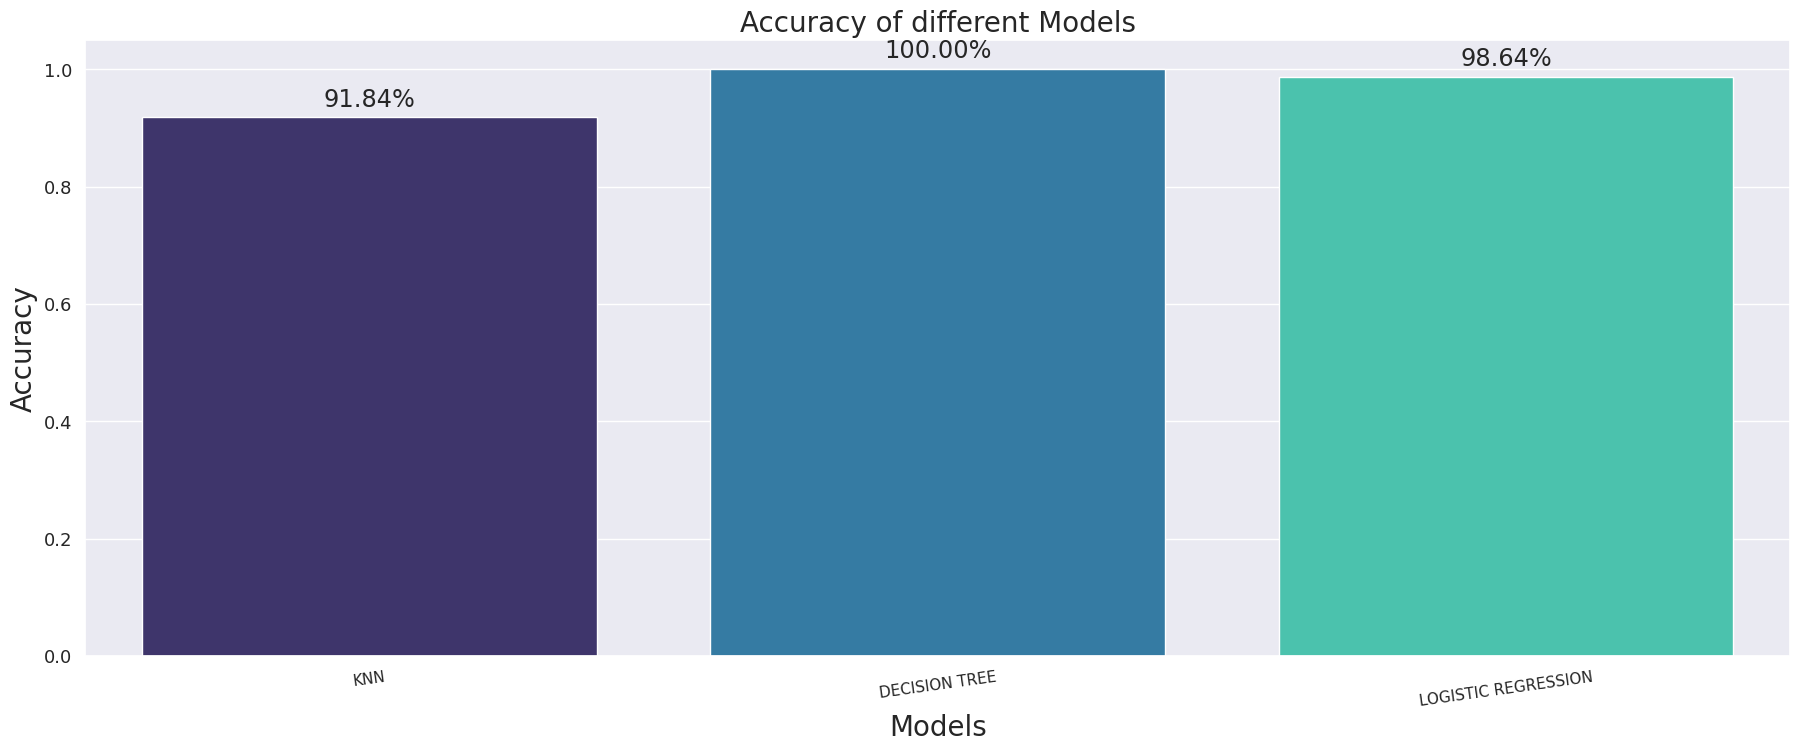

In [50]:
models = ["KNN", "DECISION TREE", "LOGISTIC REGRESSION"]
accuracies = [knn_score, dec_score, lg_score]

sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)
plt.xlabel("Models", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy of different Models", fontsize=20)
plt.xticks(fontsize=11, horizontalalignment="center", rotation=8)
plt.yticks(fontsize=13)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width()/2, p.get_height()*1.02), ha='center', fontsize='x-large')

plt.show()
